### Controller Demo

In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import sys
import scipy.stats
import pylab as plt
from IPython import display
import pylab as plt

In [4]:
sys.path.append('../codes')

In [5]:
from VMSfunctions.Chemicals import *
from VMSfunctions.Chromatograms import *
from VMSfunctions.MassSpec import *
from VMSfunctions.Controller import *
from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *

We want a notebook that does the following:
1. create a list of chemical
2. create a new mass spec object, takes chemicals
3. create a new controller, takes mass spec
4. write mzml files

Load densities trained on 4 beer data (see [loader_kde](loader_kde.ipynb)).

In [6]:
ps = load_obj('../models/peak_sampler_4_beers.p')

Load chromatogram data exported from R

In [7]:
xcms_output = '../models/beer_ms1_peaks.csv.gz'
chromatograms = ChromatogramCreator(xcms_output)

0


../codes/VMSfunctions/Common.py:53: RuntimeWarning:

divide by zero encountered in double_scalars



5000
10000
15000
20000
25000
30000
35000
40000
45000


### Generate some chemicals

In [8]:
chemicals = ChemicalCreator(ps, chromatograms)

In [9]:
min_ms1_intensity = 2E5
min_rt = 3*60
max_rt = 21*60
sampled_chemicals = chemicals.sample(min_rt, max_rt, min_ms1_intensity, 1000, 2, 'Unknown', 'Empirical', None, False)

UnknownChemical mz=198.3050 rt=318.31 max_intensity=252572.02
[ 34812.0234375   51779.51171875 125012.1640625  138162.359375
  51145.29296875  61145.01953125 125505.46875   ]


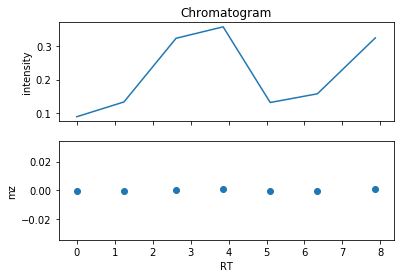

UnknownChemical mz=224.1406 rt=822.38 max_intensity=1273630.40
[ 51061.3515625  70293.6875    125386.28125   251027.765625
 383143.21875   461539.5       287760.5       227511.203125
 301827.03125    52791.359375  151766.84375  ]


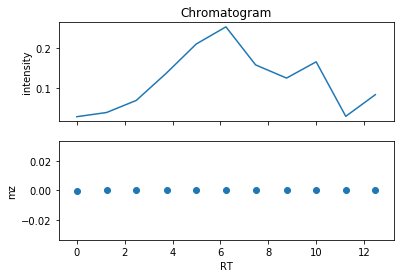

UnknownChemical mz=275.8841 rt=1195.76 max_intensity=267598.12
[ 4003.18017578 13537.51367188 21363.7578125  15221.87109375
 21985.703125   22146.72070312 14350.20996094 15359.48242188]


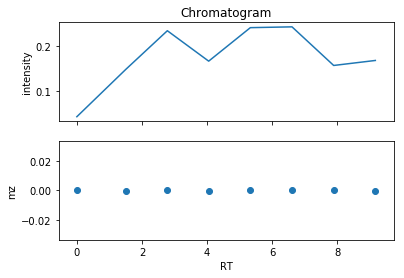

UnknownChemical mz=170.8677 rt=453.81 max_intensity=690172.37
[116702.0859375  96038.609375  132958.765625  196038.578125
 255181.46875   289352.65625   169859.40625    91777.9296875
 133961.0625    147078.40625    77611.4921875  51296.6796875]


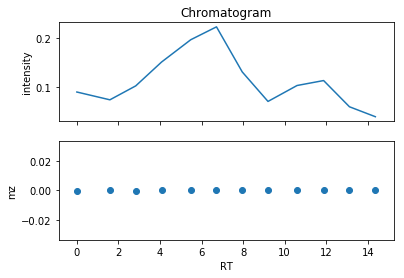

UnknownChemical mz=250.0612 rt=1236.87 max_intensity=2591245.28
[ 40625.68359375  69501.75        62971.6796875  103630.828125
  82906.5390625   47656.03515625]


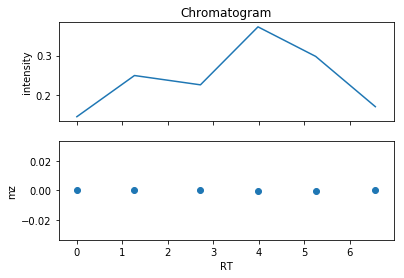

UnknownChemical mz=85.0880 rt=442.99 max_intensity=252142.20
[140583.46875  156270.625    179701.046875 203026.953125 189170.0625
 183839.046875 148731.203125]


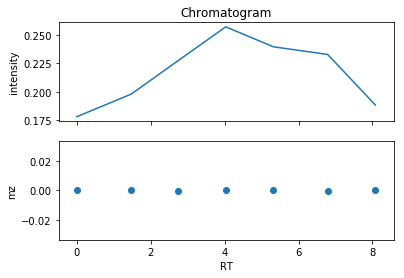

UnknownChemical mz=134.1855 rt=964.03 max_intensity=358025.00
[622045.75      911380.5625    898350.0625    775107.25
 533929.4375    590165.4375    200050.234375   85206.3515625]


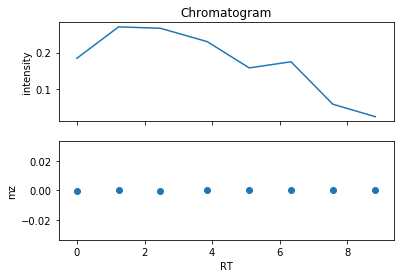

UnknownChemical mz=276.9251 rt=814.52 max_intensity=932635.78
[ 28710.50390625  50863.17578125  14636.90722656  53422.6796875
  80106.75       107222.140625   131351.984375   136667.046875
 149898.859375   167210.953125   192001.671875   170780.640625
 185564.65625    195996.25       168214.625      177505.140625
 156659.03125    129789.53125    138585.21875    106974.625
 102103.6875      81545.3671875   76622.453125    59037.1640625
  63877.0234375   38401.09765625  30811.3671875   19233.48046875
  20669.5546875   19637.52539062]


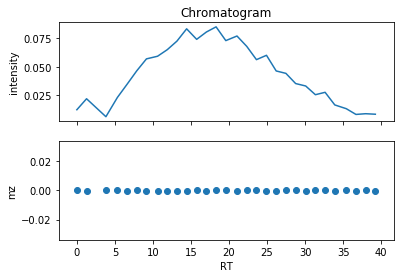

UnknownChemical mz=328.7149 rt=223.85 max_intensity=2721713.96
[199532.265625 362124.5      576891.75     628011.375    707620.125
 686963.5625   602555.1875   554643.       411670.4375   328417.59375
 317408.75    ]


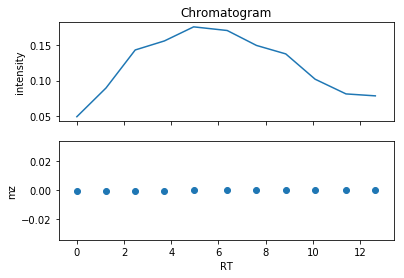

UnknownChemical mz=126.4650 rt=1114.11 max_intensity=402748.65
[175895.875   255735.8125  277758.96875 318440.125   269594.9375
 314974.96875 272734.15625 209813.71875]


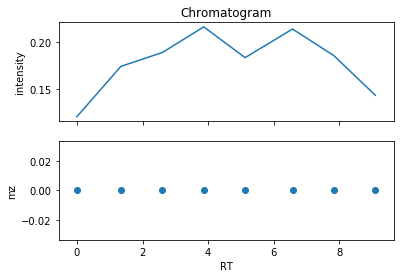

In [10]:
def plot_chromatogram(chrom):
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].plot(chrom.rts, chrom.intensities)
    axarr[0].set_title('Chromatogram')
    axarr[0].set_ylabel('intensity')
    axarr[1].scatter(chrom.rts, chrom.mzs)
    axarr[1].set_ylabel('mz')
    axarr[1].set_xlabel('RT')    
    plt.show()

for chem in sampled_chemicals[0:10]:
    print(chem)
    print(chem.chromatogram.raw_intensities)
    plot_chromatogram(chem.chromatogram)

### Set up a simple MS1 controller

Acquisition open


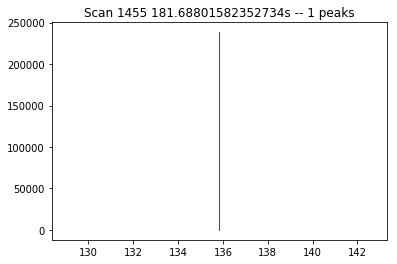

135.84100455473688 238330.90383258925


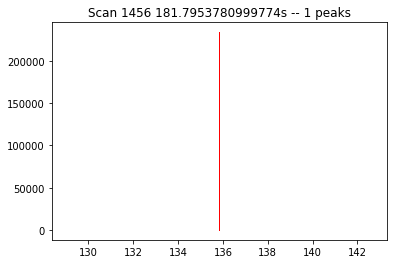

135.84100839431107 234013.0355715758


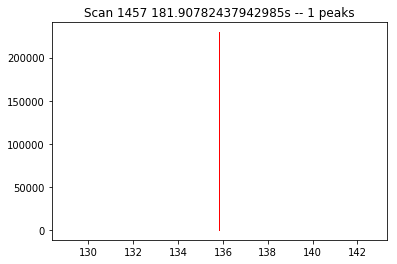

135.84101241570337 229490.70019297887


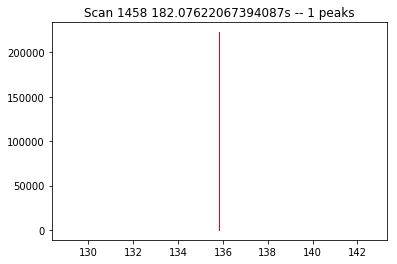

135.84101843802415 222718.18158231408


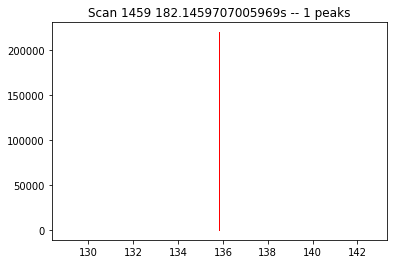

135.84102093247947 219912.9930537061


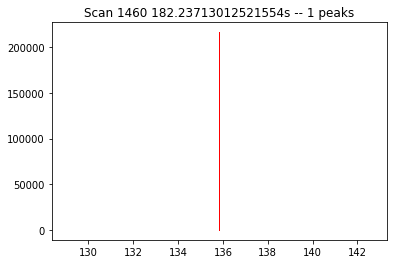

135.84102419259452 216246.76689617714


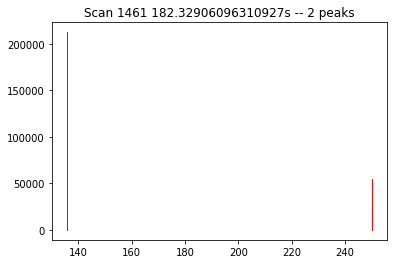

135.84102748029747 212549.51623910546
249.97153720526967 54327.960027250905


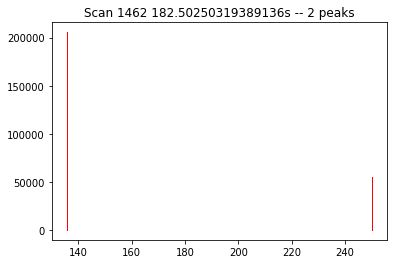

135.84103368307498 205574.06146881016
249.97154571497515 54687.15688547826


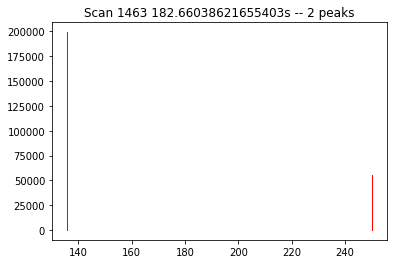

135.84103932941184 199224.36290569216
249.97155346128937 55014.13080326142


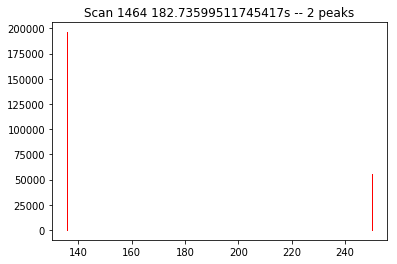

135.84104203339683 196183.54368835132
249.97155717093653 55170.71596441213


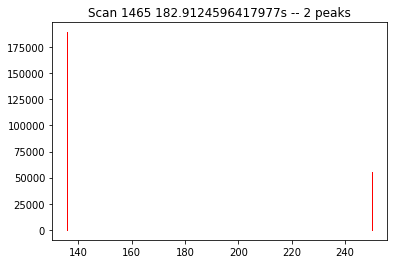

135.84104834425997 189086.53909743018
249.9715658289267 55536.17195772452


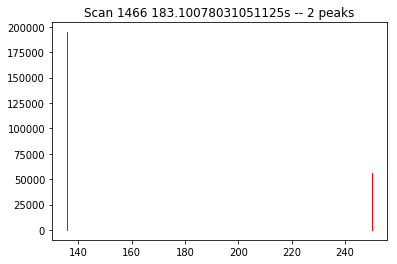

135.84104627113018 194654.00691119404
249.97157506862237 55926.18188919368


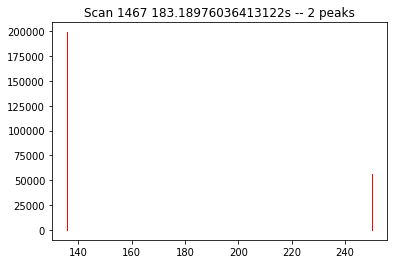

135.84104414968039 198988.29404853686
249.97157943430682 56110.4585533087


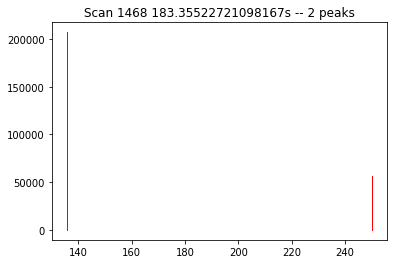

135.84104020464335 207048.31196023294
249.97158755271101 56453.138483458715


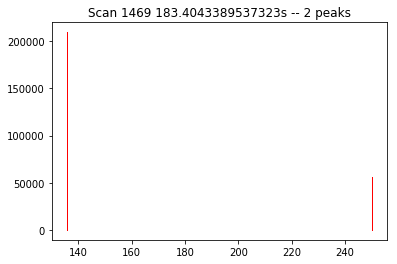

135.84103903372818 209440.58288204737
249.97158996231138 56554.848335889394


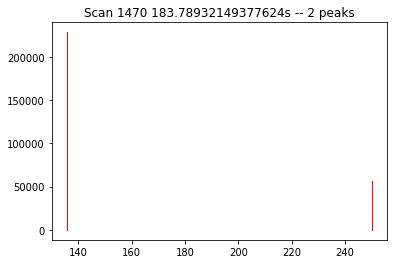

135.8410298550292 228193.3797565112
249.97158513543857 56170.88548571386


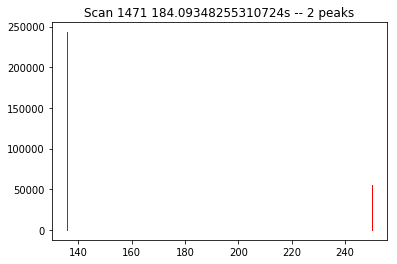

135.84102260326446 243009.29988136858
249.9715739339999 55499.54276166039


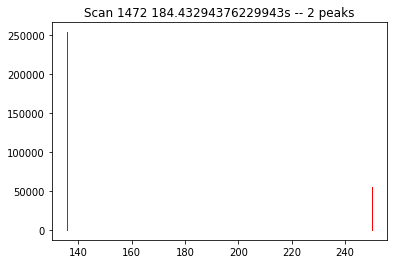

135.84101927675286 253194.76849446003
249.97156143255106 54750.28572859105


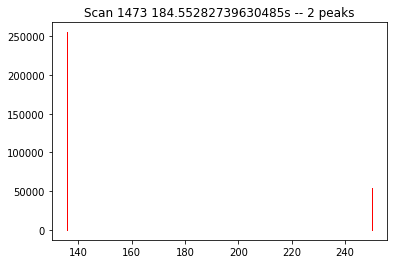

135.84101927675286 255226.92249249242
249.9715570175573 54485.6791888859


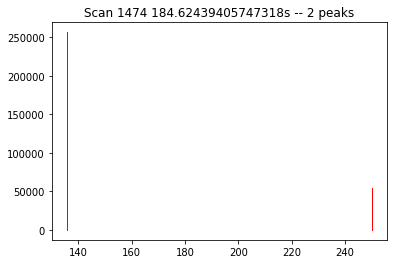

135.84101927675286 256440.05285699645
249.9715543819485 54327.717622846394


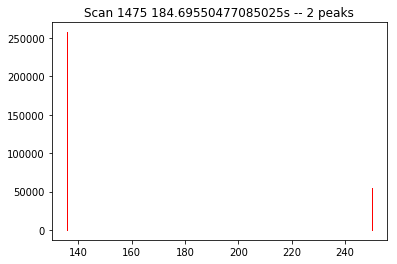

135.84101927675286 257645.45442570111
249.97155176313103 54170.76242242413


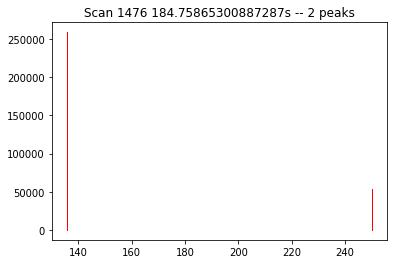

135.84101927675286 258715.88364175716
249.9715494228057 54067.436562917916
Acquisition closing


In [11]:
max_rt = 185
mass_spec = IndependentMassSpectrometer(POSITIVE, sampled_chemicals, density=ps.density_estimator)
controller = SimpleMs1Controller(mass_spec)
controller.run(max_rt)

### Set up a Top-N controller

Acquisition open
Scan 1407 -- num_peaks=1 rt=181.76 ms_level=1
Excluded precursor ion 135.84100701485093 181.7568055986604 ExclusionItem(from_mz=135.84032535760528, to_mz=135.8416837676509, from_rt=151.68823647809654, to_rt=211.68823647809654)

Scan 1408 -- num_peaks=1 rt=181.82 ms_level=1
Excluded precursor ion 135.84100910961047 181.8153793206855 ExclusionItem(from_mz=135.84032535760528, to_mz=135.8416837676509, from_rt=151.68823647809654, to_rt=211.68823647809654)

Scan 1409 -- num_peaks=1 rt=182.01 ms_level=1
Excluded precursor ion 135.84101589995274 182.00525105374126 ExclusionItem(from_mz=135.84032535760528, to_mz=135.8416837676509, from_rt=151.68823647809654, to_rt=211.68823647809654)

Scan 1410 -- num_peaks=1 rt=182.16 ms_level=1
Excluded precursor ion 135.84102139739608 182.15897071122592 ExclusionItem(from_mz=135.84032535760528, to_mz=135.8416837676509, from_rt=151.68823647809654, to_rt=211.68823647809654)

Scan 1411 -- num_peaks=1 rt=182.24 ms_level=1
Excluded precursor ion 

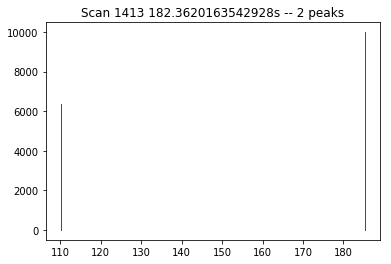

110.09846387014979 6374.4419174555405
185.38110377237334 9992.05830828886

Scan 1414 -- num_peaks=2 rt=182.50 ms_level=1
Excluded precursor ion 135.84103363712842 182.50121843471806 ExclusionItem(from_mz=135.84032535760528, to_mz=135.8416837676509, from_rt=151.68823647809654, to_rt=211.68823647809654)
Excluded precursor ion 249.9715456519402 182.50121843471806 ExclusionItem(from_mz=249.9702859417882, to_mz=249.9727856571462, from_rt=167.3004083242291, to_rt=197.3004083242291)

Scan 1415 -- num_peaks=2 rt=182.58 ms_level=1
Excluded precursor ion 135.84103637246793 182.57770407128334 ExclusionItem(from_mz=135.84032535760528, to_mz=135.8416837676509, from_rt=151.68823647809654, to_rt=211.68823647809654)
Excluded precursor ion 249.9715494046032 182.57770407128334 ExclusionItem(from_mz=249.9702859417882, to_mz=249.9727856571462, from_rt=167.3004083242291, to_rt=197.3004083242291)

Scan 1416 -- num_peaks=2 rt=182.64 ms_level=1
Excluded precursor ion 135.84103861115747 182.64030236845164 Excl

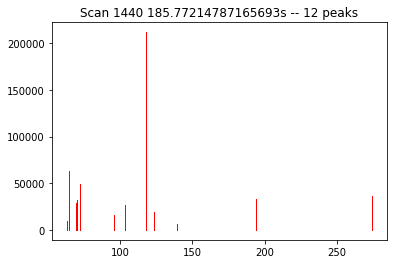

63.13477093146697 9148.992491112445
64.65015461217712 63524.04023852126
69.56228704053969 28856.162845133833
70.26798568439521 32588.66524723507
71.75497457811075 49327.706482217676
95.45959024959254 15919.011625630435
103.27805801328616 26629.620391888224
117.58455818474893 211954.51681633331
123.54750791556994 19389.15346245572
139.61628950821859 5943.271116863207
194.30309717130189 33624.299236092476
274.19765098701686 36151.11703562551

Scan 1441 -- num_peaks=4 rt=185.91 ms_level=1
Excluded precursor ion 289.72470647190016 185.91309286333163 ExclusionItem(from_mz=289.72323176856963, to_mz=289.7261290153736, from_rt=170.58598321768324, to_rt=200.58598321768324)
Excluded precursor ion 135.84100496855183 185.91309286333163 ExclusionItem(from_mz=135.84032535760528, to_mz=135.8416837676509, from_rt=151.68823647809654, to_rt=211.68823647809654)
Isolated precursor ion 384.4050134419776 window [[(384.40309141691034, 384.40693546704483)]]
Excluded precursor ion 249.97149994147387 185.913092

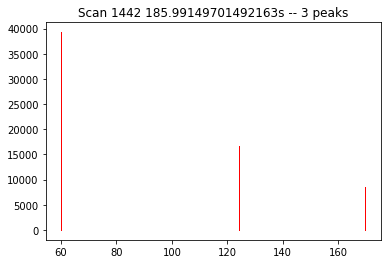

59.954367078574194 39265.27689408542
124.36188652039661 16742.02158397816
169.78431728053746 8577.616696610465

Scan 1443 -- num_peaks=4 rt=186.14 ms_level=1
Excluded precursor ion 289.7247246543792 186.1411481002413 ExclusionItem(from_mz=289.72323176856963, to_mz=289.7261290153736, from_rt=170.58598321768324, to_rt=200.58598321768324)
Excluded precursor ion 135.84099681266102 186.1411481002413 ExclusionItem(from_mz=135.84032535760528, to_mz=135.8416837676509, from_rt=151.68823647809654, to_rt=211.68823647809654)
Excluded precursor ion 384.40495426091024 186.1411481002413 ExclusionItem(from_mz=384.40309141691034, to_mz=384.40693546704483, from_rt=170.91309286333163, to_rt=200.91309286333163)
Excluded precursor ion 249.97149016662345 186.1411481002413 ExclusionItem(from_mz=249.9702859417882, to_mz=249.9727856571462, from_rt=167.3004083242291, to_rt=197.3004083242291)

Scan 1444 -- num_peaks=4 rt=186.21 ms_level=1
Excluded precursor ion 289.7247303209787 186.21222189051093 ExclusionItem(

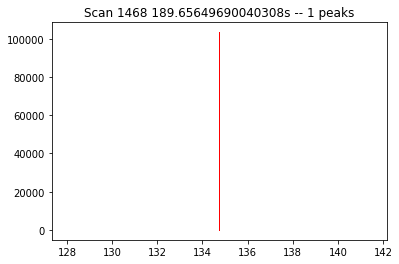

134.74265783249353 103402.8467463705

Scan 1469 -- num_peaks=5 rt=189.93 ms_level=1
Excluded precursor ion 289.72477750393773 189.92648345382545 ExclusionItem(from_mz=289.72323176856963, to_mz=289.7261290153736, from_rt=170.58598321768324, to_rt=200.58598321768324)
Excluded precursor ion 135.84100604965582 189.92648345382545 ExclusionItem(from_mz=135.84032535760528, to_mz=135.8416837676509, from_rt=151.68823647809654, to_rt=211.68823647809654)
Excluded precursor ion 384.40493958259486 189.92648345382545 ExclusionItem(from_mz=384.40309141691034, to_mz=384.40693546704483, from_rt=170.91309286333163, to_rt=200.91309286333163)
Excluded precursor ion 259.0961947163787 189.92648345382545 ExclusionItem(from_mz=259.0949073253814, to_mz=259.0974982874095, from_rt=174.5903446798613, to_rt=204.5903446798613)
Excluded precursor ion 249.97141946076647 189.92648345382545 ExclusionItem(from_mz=249.9702859417882, to_mz=249.9727856571462, from_rt=167.3004083242291, to_rt=197.3004083242291)

Scan 1470 -

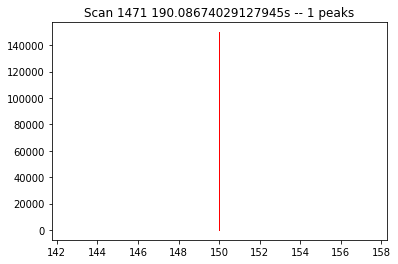

150.01166078791545 149887.52937490024

Scan 1472 -- num_peaks=7 rt=190.21 ms_level=1
Excluded precursor ion 289.7248046804978 190.21122771119482 ExclusionItem(from_mz=289.72323176856963, to_mz=289.7261290153736, from_rt=170.58598321768324, to_rt=200.58598321768324)
Excluded precursor ion 135.84101623290397 190.21122771119482 ExclusionItem(from_mz=135.84032535760528, to_mz=135.8416837676509, from_rt=151.68823647809654, to_rt=211.68823647809654)
Excluded precursor ion 235.8518264416842 190.21122771119482 ExclusionItem(from_mz=235.85067784742566, to_mz=235.85303636599676, from_rt=175.0088700850148, to_rt=205.0088700850148)
Excluded precursor ion 384.4049011325723 190.21122771119482 ExclusionItem(from_mz=384.40309141691034, to_mz=384.40693546704483, from_rt=170.91309286333163, to_rt=200.91309286333163)
Excluded precursor ion 259.096187863299 190.21122771119482 ExclusionItem(from_mz=259.0949073253814, to_mz=259.0974982874095, from_rt=174.5903446798613, to_rt=204.5903446798613)

Scan 1473 --

Excluded precursor ion 235.85178961395255 193.83182438304766 ExclusionItem(from_mz=235.85067784742566, to_mz=235.85303636599676, from_rt=175.0088700850148, to_rt=205.0088700850148)
Excluded precursor ion 135.84097544905302 193.83182438304766 ExclusionItem(from_mz=135.84032535760528, to_mz=135.8416837676509, from_rt=151.68823647809654, to_rt=211.68823647809654)
Excluded precursor ion 384.40477533007356 193.83182438304766 ExclusionItem(from_mz=384.40309141691034, to_mz=384.40693546704483, from_rt=170.91309286333163, to_rt=200.91309286333163)
Excluded precursor ion 259.09617454067535 193.83182438304766 ExclusionItem(from_mz=259.0949073253814, to_mz=259.0974982874095, from_rt=174.5903446798613, to_rt=204.5903446798613)

Scan 1501 -- num_peaks=9 rt=193.89 ms_level=1
Excluded precursor ion 289.7247216683341 193.88656679267893 ExclusionItem(from_mz=289.72323176856963, to_mz=289.7261290153736, from_rt=170.58598321768324, to_rt=200.58598321768324)
Excluded precursor ion 235.85178763456182 193.8

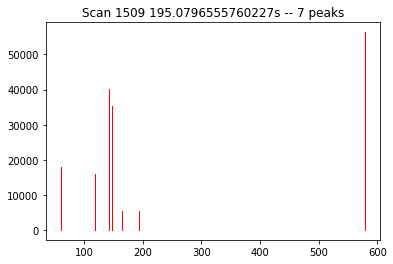

60.26807105726062 18010.43977326064
117.99728397381745 16064.732936494976
142.63722498710933 40106.42180397292
148.2740169081143 35431.50647532471
165.31678778325906 5474.56740732913
194.47937521635674 5350.911165402755
579.3521332088962 56340.85108965409

Scan 1510 -- num_peaks=12 rt=195.20 ms_level=1
Excluded precursor ion 289.7247426714935 195.20374210422193 ExclusionItem(from_mz=289.72323176856963, to_mz=289.7261290153736, from_rt=170.58598321768324, to_rt=200.58598321768324)
Excluded precursor ion 235.85175424373176 195.20374210422193 ExclusionItem(from_mz=235.85067784742566, to_mz=235.85303636599676, from_rt=175.0088700850148, to_rt=205.0088700850148)
Excluded precursor ion 211.16083677420275 195.20374210422193 ExclusionItem(from_mz=211.15976904598713, to_mz=211.16188065423566, from_rt=179.71611277789242, to_rt=209.71611277789242)
Excluded precursor ion 135.84100401796388 195.20374210422193 ExclusionItem(from_mz=135.84032535760528, to_mz=135.8416837676509, from_rt=151.68823647809

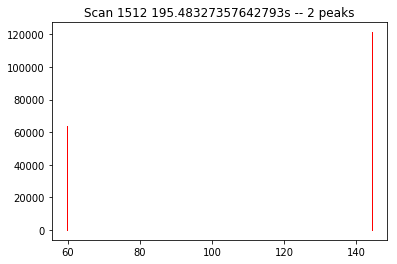

59.77235954219729 63956.25910298519
144.2556304842439 121355.06003654462

Scan 1513 -- num_peaks=13 rt=195.62 ms_level=1
Excluded precursor ion 289.72476176052174 195.62077949252188 ExclusionItem(from_mz=289.72323176856963, to_mz=289.7261290153736, from_rt=170.58598321768324, to_rt=200.58598321768324)
Excluded precursor ion 235.85174882038157 195.62077949252188 ExclusionItem(from_mz=235.85067784742566, to_mz=235.85303636599676, from_rt=175.0088700850148, to_rt=205.0088700850148)
Excluded precursor ion 211.1608469720962 195.62077949252188 ExclusionItem(from_mz=211.15976904598713, to_mz=211.16188065423566, from_rt=179.71611277789242, to_rt=209.71611277789242)
Excluded precursor ion 155.8504062770071 195.62077949252188 ExclusionItem(from_mz=155.84958583118402, to_mz=155.85114433483483, from_rt=180.31694167376205, to_rt=210.31694167376205)
Excluded precursor ion 135.84100401796388 195.62077949252188 ExclusionItem(from_mz=135.84032535760528, to_mz=135.8416837676509, from_rt=151.688236478096

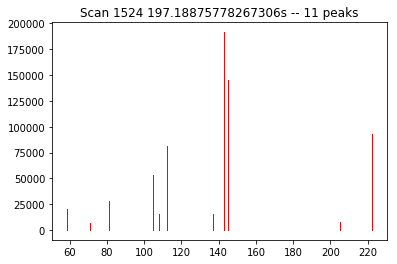

58.785460355307464 19863.21144109219
70.91360894529069 6994.260179222948
81.35699067784462 27760.44030338458
104.96375473428732 53093.63052509283
107.83226832289283 15814.298629001103
112.10509101756999 81003.7481894818
137.07822773145068 15332.147760171094
142.711508731702 191503.7327099704
145.13148828010281 144961.52552836304
204.93564452473942 7906.04597803655
222.11576437705335 93304.45259723674

Scan 1525 -- num_peaks=13 rt=197.32 ms_level=1
Excluded precursor ion 211.16085178276015 197.32240838842537 ExclusionItem(from_mz=211.15976904598713, to_mz=211.16188065423566, from_rt=179.71611277789242, to_rt=209.71611277789242)
Excluded precursor ion 130.6744685380823 197.32240838842537 ExclusionItem(from_mz=130.6737910753392, to_mz=130.6750978197837, from_rt=182.10488533153068, to_rt=212.10488533153068)
Excluded precursor ion 289.7248050170209 197.32240838842537 ExclusionItem(from_mz=289.72323176856963, to_mz=289.7261290153736, from_rt=170.58598321768324, to_rt=200.58598321768324)
Excl

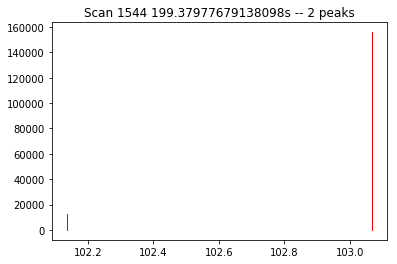

102.13693966476536 12856.269402179805
103.06666922744193 155914.5302281935

Scan 1545 -- num_peaks=11 rt=199.66 ms_level=1
Excluded precursor ion 211.16080816564423 199.6588067284982 ExclusionItem(from_mz=211.15976904598713, to_mz=211.16188065423566, from_rt=179.71611277789242, to_rt=209.71611277789242)
Excluded precursor ion 130.67453366978037 199.6588067284982 ExclusionItem(from_mz=130.6737910753392, to_mz=130.6750978197837, from_rt=182.10488533153068, to_rt=212.10488533153068)
Excluded precursor ion 155.85060251624395 199.6588067284982 ExclusionItem(from_mz=155.84958583118402, to_mz=155.85114433483483, from_rt=180.31694167376205, to_rt=210.31694167376205)
Excluded precursor ion 131.86592002382662 199.6588067284982 ExclusionItem(from_mz=131.86533606678285, to_mz=131.86665472673684, from_rt=184.27197112613194, to_rt=214.27197112613194)
Excluded precursor ion 384.40490644130597 199.6588067284982 ExclusionItem(from_mz=384.40309141691034, to_mz=384.40693546704483, from_rt=170.91309286333

In [13]:
max_rt = 200                    # the maximum retention time of scans to generate
N = 5                           # top-5 DDA fragmentation
mz_tol = 5                      # the mz isolation window around a selected precursor ion
rt_tol = 15                     # the rt window around a selected precursor ion to prevent it from fragmented multiple times
min_ms2_intensity = 5000        # the minimum ms2 peak intensity

mass_spec = IndependentMassSpectrometer(POSITIVE, sampled_chemicals, density=ps.density_estimator)
controller = TopNController(mass_spec, N, mz_tol, rt_tol, min_ms2_intensity=min_ms2_intensity)
controller.run(max_rt)

In [14]:
controller.write_mzML('my_analysis', '../models/out.mzML')